In [1]:
import numpy as np
import pandas as pd

In [2]:
train_path = "/kaggle/input/System-Threat-Forecaster/train.csv"
test_path = "/kaggle/input/System-Threat-Forecaster/test.csv"

df = pd.read_csv(train_path)
X_test = pd.read_csv(test_path)

df.shape, X_test.shape

((100000, 76), (10000, 75))

In [3]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [5]:
df.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


# Feature Engineering

In [6]:
df["DateAS"] = pd.to_datetime(df["DateAS"], errors="coerce")
df["DateOS"] = pd.to_datetime(df["DateOS"], errors="coerce")

reference_DateAS = df["DateAS"].max()
reference_DateOS = df["DateOS"].max()

df["DaysSinceAS"] = (reference_DateAS - df["DateAS"]).dt.days
df["DaysSinceOS"] = (reference_DateOS - df["DateOS"]).dt.days


X_test["DateAS"] = pd.to_datetime(X_test["DateAS"], errors="coerce")
X_test["DateOS"] = pd.to_datetime(X_test["DateOS"], errors="coerce")

reference_test_DateAS = X_test["DateAS"].max()
reference_test_DateOS = X_test["DateOS"].max()

X_test["DaysSinceAS"] = (reference_test_DateAS - X_test["DateAS"]).dt.days
X_test["DaysSinceOS"] = (reference_test_DateOS - X_test["DateOS"]).dt.days

In [7]:
version_columns = []
for col in df.columns:
    if "version" in col.lower():
        version_columns.append(col)
print(version_columns)
df[version_columns]

['EngineVersion', 'AppVersion', 'SignatureVersion', 'OSVersion', 'IEVersionID', 'NumericOSVersion', 'FirmwareVersionID']


,EngineVersion,AppVersion,SignatureVersion,OSVersion,IEVersionID,NumericOSVersion,FirmwareVersionID
0,1.1.15200.1,4.18.1807.18075,1.275.1003.0,10.0.0.0,98.0,10.0.14393.2214,21964.0
1,1.1.15100.1,4.18.1807.18075,1.273.1465.0,10.0.0.0,137.0,10.0.17134.228,44548.0
2,1.1.15200.1,4.18.1807.18075,1.275.1546.0,10.0.0.0,137.0,10.0.17134.285,9414.0
3,1.1.15200.1,4.12.17007.18011,1.275.1141.0,10.0.0.0,108.0,10.0.15063.850,33060.0
4,1.1.15200.1,4.13.17134.228,1.275.1283.0,10.0.0.0,137.0,10.0.17134.285,13224.0
...,...,...,...,...,...,...,...
99995,1.1.15200.1,4.18.1807.18075,1.275.1582.0,10.0.0.0,117.0,10.0.17134.319,25740.0
99996,1.1.15100.1,4.18.1806.18062,1.273.1156.0,10.0.0.0,137.0,10.0.17134.165,20900.0
99997,1.1.15200.1,4.18.1807.18075,1.275.209.0,10.0.0.0,111.0,10.0.16299.309,51605.0
99998,1.1.14901.4,4.16.17656.18052,1.269.641.0,10.0.0.0,137.0,10.0.17134.48,18669.0


In [8]:
def version_to_integer(version):
    if pd.isna(version):
        return np.nan
    if isinstance(version, str):
        return int(str(version).replace(".", ""))
    return version

for col in version_columns:
    df[col] = df[col].apply(version_to_integer)
    X_test[col] = X_test[col].apply(version_to_integer)

In [9]:
df[version_columns]

,EngineVersion,AppVersion,SignatureVersion,OSVersion,IEVersionID,NumericOSVersion,FirmwareVersionID
0,11152001,418180718075,127510030,10000,98.0,100143932214,21964.0
1,11151001,418180718075,127314650,10000,137.0,10017134228,44548.0
2,11152001,418180718075,127515460,10000,137.0,10017134285,9414.0
3,11152001,4121700718011,127511410,10000,108.0,10015063850,33060.0
4,11152001,41317134228,127512830,10000,137.0,10017134285,13224.0
...,...,...,...,...,...,...,...
99995,11152001,418180718075,127515820,10000,117.0,10017134319,25740.0
99996,11151001,418180618062,127311560,10000,137.0,10017134165,20900.0
99997,11152001,418180718075,12752090,10000,111.0,10016299309,51605.0
99998,11149014,4161765618052,12696410,10000,137.0,1001713448,18669.0


# Dimensionality Reduction

In [10]:
for col in df.columns:
    if len(df[col].unique()) > 15000:
        corr = df.groupby(col)["target"].mean().corr(df["target"])
        if abs(corr) < .05:
            print(f'"{col}"', end=", ")

"CityID", "OEMModelID", "SystemVolumeCapacityMB", 

In [11]:
unnecessary_features = [
    "MachineID", "ProductName", "IsBetaUser", "CityID", "AutoSampleSubmissionEnabled",
    "IsFlightsDisabled", "OSBuildLab", "OEMModelID", "SystemVolumeCapacityMB", "DateAS", "DateOS",
    
]
df = df.drop(columns=unnecessary_features)
X_test = X_test.drop(columns=unnecessary_features)
df.shape, X_test.shape

((100000, 67), (10000, 66))

In [12]:
df[df["target"] == 0].shape[0], df[df["target"] == 1].shape[0]

(49475, 50525)

In [13]:
X = df.drop(columns=["target"])
y = df["target"]

# EDA

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

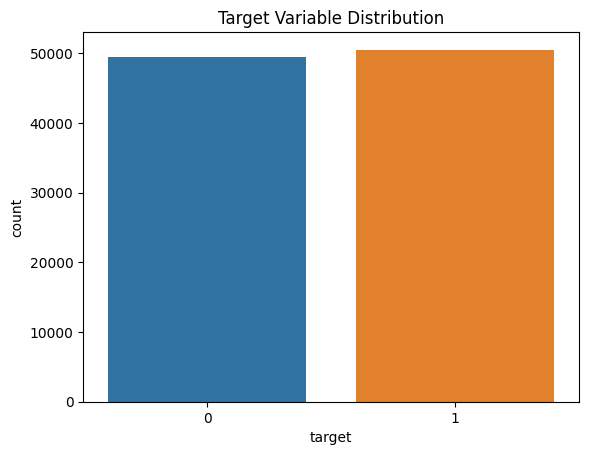

In [15]:
sns.countplot(x="target", data=df)
plt.title("Target Variable Distribution")
plt.show()

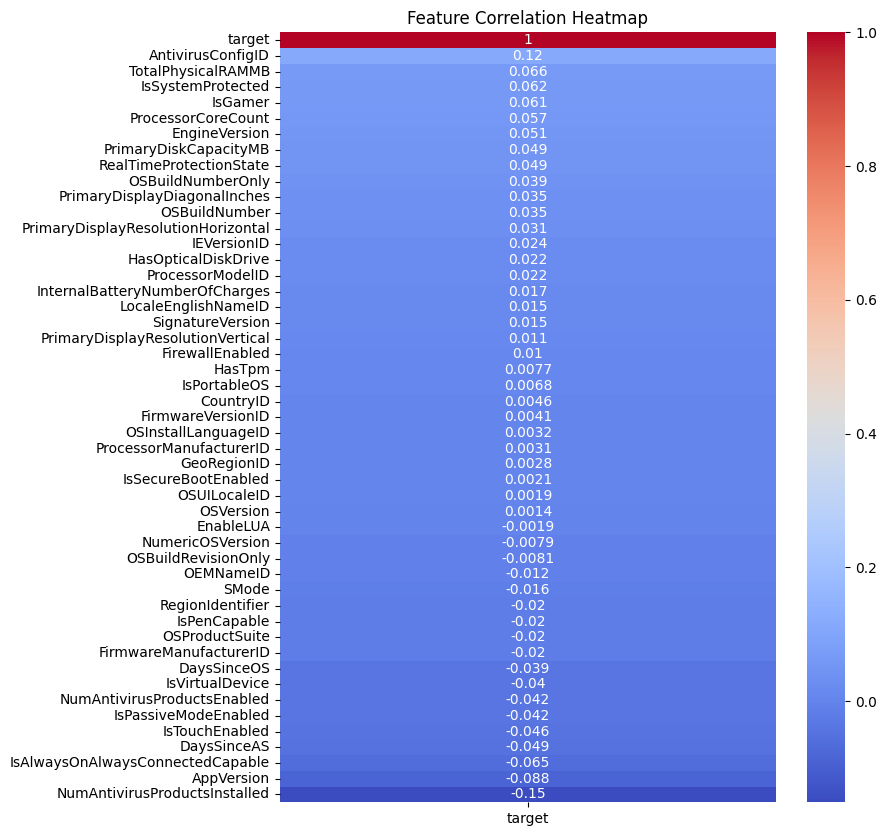

In [16]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(8, 10))
target_corr = numeric_df.corr()[["target"]].sort_values("target", ascending=False)
sns.heatmap(target_corr, annot=True, cmap="coolwarm", mask=target_corr.isna())
plt.title("Feature Correlation Heatmap")
plt.show()

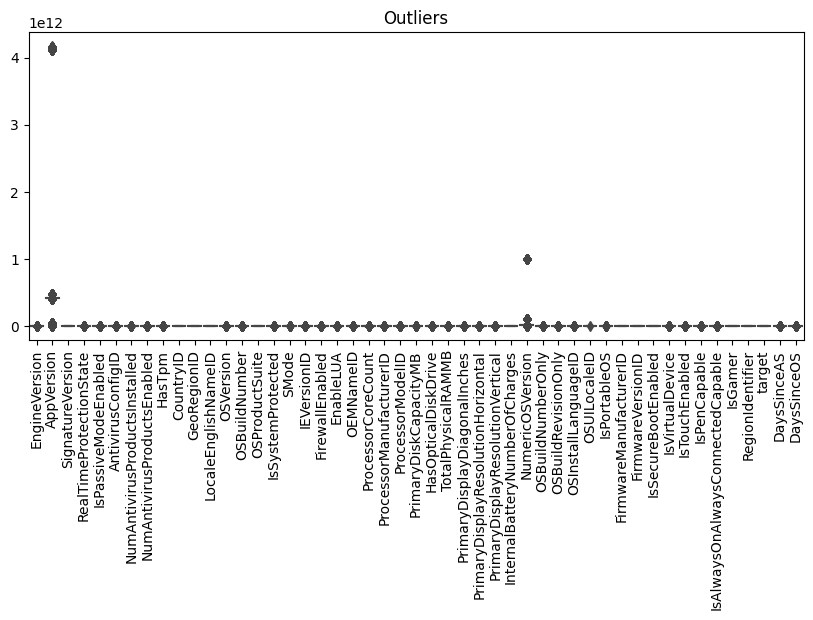

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.title("Outliers")
plt.show()

# Train Validation Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((80000, 66), (80000,), (20000, 66), (20000,))

# Pre Processing

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [21]:
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['EngineVersion', 'AppVersion', 'SignatureVersion',
       'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'GeoRegionID', 'LocaleEnglishNa...
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['PlatformType', 'Processor', 'OsPlatformSubRelease', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'OSArchitecture', 'OSBranch', 'OSEdition',
       'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName',
       'OSGenuineState', 'LicenseActivationChannel', 'FlightRing'],
      dtype='object'))])

In [22]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [23]:
X_train.shape, X_val.shape

((80000, 210), (20000, 210))

# Model 1

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

## Base Line Model

In [25]:
sgd = SGDClassifier(
    loss="log_loss",
    penalty="l2",
    alpha=.01,
    learning_rate="constant",
    eta0=.01,
    max_iter=2000,
    n_iter_no_change=10,
    tol=1e-4,
    random_state=42
)
# sgd.fit(X_train, y_train)

In [26]:
# sgd.score(X_val, y_val)

## Hyperparameter Tuning

In [27]:
params = {
    "loss" : ["log_loss"],
    "penalty" : ["l1", "l2", "elasticnet"],
    "learning_rate" : ["constant", "adaptive"],
    "alpha" : [.1, .01, .001, .0001],
    "eta0" : [.1, .01, .001],
    "max_iter" : [1000, 2000],
    "l1_ratio" : [.1, .25, .5, .75, 1]
}

sgd = SGDClassifier(random_state=42, n_iter_no_change=10, early_stopping=True, tol=1e-4)

In [28]:
grid = GridSearchCV(
    estimator=sgd,
    param_grid=params,
    cv=3,
    scoring="accuracy"
)

In [29]:
# grid.fit(X_train, y_train)

In [30]:
{'alpha': 0.0001,
 'eta0': 0.01,
 'l1_ratio': 0.5,
 'learning_rate': 'adaptive',
 'loss': 'log_loss',
 'max_iter': 1000,
 'penalty': 'elasticnet'}

# grid.best_params_

{'alpha': 0.0001,
 'eta0': 0.01,
 'l1_ratio': 0.5,
 'learning_rate': 'adaptive',
 'loss': 'log_loss',
 'max_iter': 1000,
 'penalty': 'elasticnet'}

In [31]:
sgd = SGDClassifier(
    random_state=42,
    n_iter_no_change=10,
    early_stopping=True,
    tol=1e-4,
    alpha=0.0001,
    eta0=0.01,
    l1_ratio=0.5,
    learning_rate="adaptive",
    loss="log_loss",
    max_iter=1000,
    penalty="elasticnet"
)
# sgd.fit(X_train, y_train)

In [32]:
# sgd.score(X_train, y_train), sgd.score(X_val, y_val)

# Model 2

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)
# rfc.fit(X_train, y_train)

In [35]:
# rfc.score(X_val, y_val)

## Hyperparameter Tuning

In [36]:
params = {
    "class_weight" : ["balanced"],
    "n_estimators" : [500, 600],
    "max_depth" : [50, 60],
    "min_samples_split" : [5, 10]
}
rfc = RandomForestClassifier(random_state=42)

In [37]:
grid = GridSearchCV(
    estimator=rfc,
    param_grid=params,
    cv=3,
    scoring="accuracy"
)

In [38]:
# grid.fit(X_train, y_train)

In [39]:
{'class_weight': 'balanced',
 'max_depth': 50,
 'min_samples_split': 10,
 'n_estimators': 600}

# grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 50,
 'min_samples_split': 10,
 'n_estimators': 600}

In [40]:
rfc = RandomForestClassifier(
    class_weight='balanced',
    max_depth=50,
    min_samples_split=10,
    n_estimators=600,
    random_state=42
)
# rfc.fit(X_train, y_train)

In [41]:
# rfc.score(X_train, y_train), rfc.score(X_val, y_val)

# Model 3

In [42]:
from lightgbm import LGBMClassifier

In [43]:
lgb = LGBMClassifier(
    objective="binary",
    metric="accuracy",
    n_estimators=100,
    max_depth=10,
    learning_rate=.1,
    min_child_samples=10,
    num_leaves=20,
    random_state=42,
    verbose=-1
)

In [44]:
lgb.fit(X_train, y_train)

LGBMClassifier(max_depth=10, metric='accuracy', min_child_samples=10,
               num_leaves=20, objective='binary', random_state=42, verbose=-1)

In [45]:
lgb.score(X_val, y_val)

0.6289

## Hyperparameter Tuning

In [46]:
params = {
    "n_estimators" : [100, 200, 300],
    "max_depth" : [1, 5, 10],
    "learning_rate" : [0.01, 0.05, 0.1],
    "min_child_samples" : [30, 40, 50],
    "num_leaves" : [20, 30, 40]
}
lgb = LGBMClassifier(objective="binary", metric="accuracy", random_state=42, verbose=-1)

In [47]:
grid = GridSearchCV(
    estimator=lgb,
    param_grid=params,
    scoring="accuracy",
    cv=3
)

In [48]:
# grid.fit(X_train, y_train)

In [49]:
{'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_samples': 40,
 'n_estimators': 200,
 'num_leaves': 30}

# grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_samples': 40,
 'n_estimators': 200,
 'num_leaves': 30}

In [50]:
lgb = LGBMClassifier(
    objective="binary",
    metric="accuracy",
    n_estimators=200,
    max_depth=10,
    learning_rate=.05,
    min_child_samples=40,
    num_leaves=30,
    random_state=42,
    verbose=-1
)
lgb.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, max_depth=10, metric='accuracy',
               min_child_samples=40, n_estimators=200, num_leaves=30,
               objective='binary', random_state=42, verbose=-1)

In [51]:
lgb.score(X_train, y_train), lgb.score(X_val, y_val)

(0.655675, 0.62935)

# Model 4

In [52]:
from xgboost import XGBClassifier

## Hyperparameter Tuning

In [53]:
params = {
    "learning_rate" : [.05, .1, .5],
    "max_depth" : [3, 5, 7],
    "n_estimators" : [100, 200, 300],
    "min_child_weight" : [3, 5, 7]
}

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    verbose=-1,
    n_jobs=-1
)

In [54]:
grid = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    cv=3,
    scoring="accuracy",
    verbose=-1
)
# grid.fit(X_train, y_train)

In [55]:
{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 200}

# grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 200}

In [56]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=200
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [57]:
xgb.score(X_train, y_train), xgb.score(X_val, y_val)

(0.66305, 0.63075)

# Comparison

In [58]:
# sgd.score(X_val, y_val), rfc.score(X_val, y_val), lgb.score(X_val, y_val), xgb.score(X_val, y_val)

# Submission

In [59]:
# y_pred = sgd.predict(X_test)
# y_pred = rfc.predict(X_test)
y_pred = lgb.predict(X_test)
# y_pred = xgb.predict(X_test)

In [60]:
submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred})
submission.to_csv('submission.csv', index=False)